In [1]:
import pandas as pd
import numpy as np
from GrandPrix import GrandPrix

## Helper function

MapTo01 converts everything between [0,1]


In [2]:
def MapTo01(y):
    return (y.copy() - y.min(0)) / (y.max(0) - y.min(0))

In [3]:
Y = pd.read_csv('../data/droplet_68k/Matrix_M_1000.csv', index_col=[0]).values

In [4]:
N, D = Y.shape
print('Cells: %s, Genes: %s'%(N, D))

Cells: 68579, Genes: 1000


In [5]:
np.random.seed(10)

## Initialise Latent spaces using t-SNE

In [6]:
tsne_2D = pd.read_csv('../data/droplet_68k/tsne.csv', index_col=0)
tsne_2D.head()

,X1,X2,cls_id,k
1,7.578376,0.642549,CD8+ Cytotoxic T,6
2,2.864957,-25.630973,CD8+/CD45RA+ Naive Cytotoxic,4
3,-6.033593,11.663585,CD4+/CD25 T Reg,3
4,1.832137,26.058027,CD19+ B,7
5,-16.583451,-16.572102,CD4+/CD25 T Reg,2


In [7]:
labels = np.sort(np.unique(tsne_2D['k']))
labels

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
from utils import plot_XY
# plt.rcParams['axes.prop_cycle'] = prop_cycle

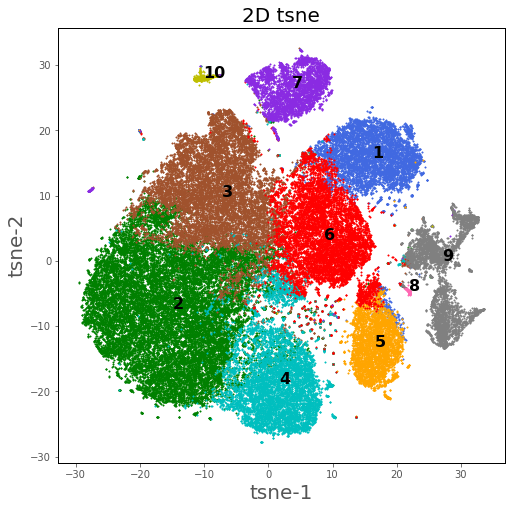

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(8, 8))
plt.subplot(1, 1, 1)
plot_XY(X=tsne_2D['X1'], Y=tsne_2D['X2'], title='2D tsne', data_labels=tsne_2D['k'],
        label_order=labels, ms=2, xlabel='tsne-1', ylabel='tsne-2')

In [10]:
Q = 2
X_mean = np.zeros((N, Q))
X_mean[:, 0] = MapTo01(tsne_2D['X1'].values)
X_mean[:, 1] = MapTo01(tsne_2D['X2'].values)

## Inducing points

In [11]:
M = 60
Z = np.zeros((M, Q))
indPoints = pd.read_csv('../data/droplet_68k/init_inducing.csv', index_col=[0])
Z[:, 0] = np.random.permutation(indPoints['D1'].values)[:M]
Z[:, 1] = np.random.permutation(indPoints['D2'].values)[:M]

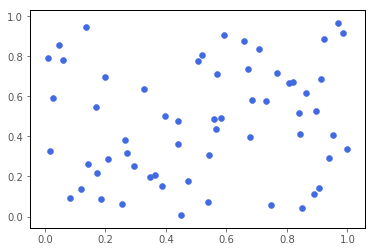

In [12]:
plt.scatter(Z[:, 0], Z[:, 1])

## Optimising inducing points

In [13]:
X, var = GrandPrix.fit_model(data=Y, n_latent_dims=Q, n_inducing_points = M,
                                    latent_mean=X_mean.copy(), inducing_inputs=Z.copy(), display=True)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 96842749.724085
  Number of iterations: 24
  Number of functions evaluations: 28


## Fixing Inducing points

In [14]:
X_fixed_ip, var_fixed_ipp = GrandPrix.fit_model(data=Y, n_latent_dims=Q, n_inducing_points = M,
                                    latent_mean=X_mean.copy(), inducing_inputs=Z.copy(), 
                                    fix_parameters=['inducing_inputs'], jitter_level=1e-5, display=True)

sumon
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 97000933.177652
  Number of iterations: 28
  Number of functions evaluations: 32


## Visualise the 2D GPLVM outputs

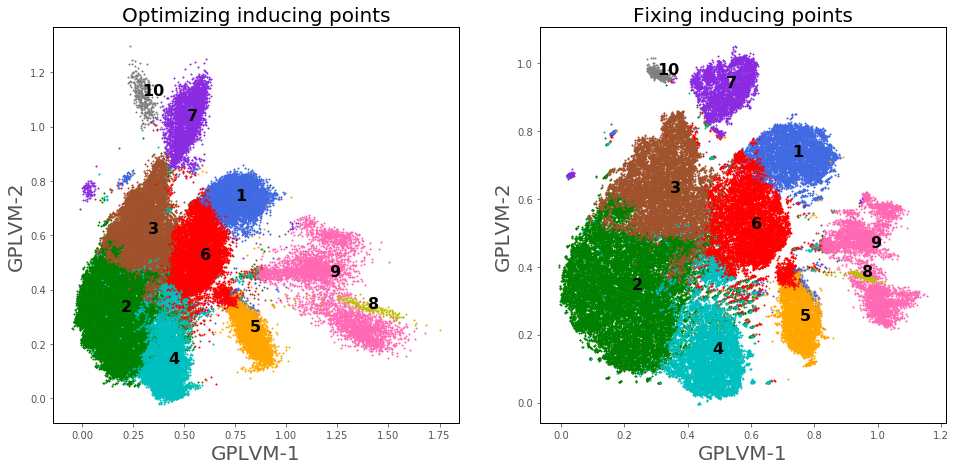

In [15]:
labels = [ 1,  2,  3,  4,  5,  6,  7, 9, 10, 8]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 16))
plt.subplot(2, 2, 1)
plot_XY(X[:,0], X[:,1], title='Optimizing inducing points', data_labels=tsne_2D['k'], label_order=labels, ms=2, xlabel='GPLVM-1')
plt.subplot(2, 2, 2)
plot_XY(X_fixed_ip[:,0], X_fixed_ip[:,1], title='Fixing inducing points', data_labels=tsne_2D['k'], label_order=labels, ms=2, xlabel='GPLVM-1')